# Data Mining Assignment - Clustering

## I. Clustering

Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

### Dataset 1 - Car_data

Loading Car Data

In [2]:
car_data = pd.read_csv("C:/Users/HP/Downloads/DM_Ass_Cluster_Assoc/cardata.csv")

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Resp.Id                          25 non-null     int64
 1   Indian Technlogy high order      25 non-null     int64
 2   Buy Made in India                25 non-null     int64
 3   Value for money                  25 non-null     int64
 4   Convenience over style           25 non-null     int64
 5   Don't do waste full expenditure  25 non-null     int64
 6   No compromise on safety          25 non-null     int64
 7   Saver not spender                25 non-null     int64
 8   Try new things                   25 non-null     int64
 9   Be part of a changing world      25 non-null     int64
 10  Purchase Intentions              25 non-null     int64
 11  Occupation                       25 non-null     int64
 12  Family income                    25 non-null     int

In [4]:
car_data.head()

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


Loading data description:

In [5]:
car_data_desc = pd.read_csv("C:/Users/HP/Downloads/DM_Ass_Cluster_Assoc/cardata description.csv")
car_data_desc.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3'], inplace=True)

In [6]:
car_data_desc

,Respondent Id,
0,Indian Technlogy high order,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
1,Buy Made in India,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
2,Value for money,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
3,Convenience over style,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
4,Don't do waste full expenditure,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
5,No compromise on safety,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
6,Saver not spender,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
7,Try new things,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
8,Be part of a changing world,"1 = Strongly disagree, 2 = disagree, 3 = neutr..."
9,Purchase Intentions,"1 = Yes, 0 = No"


The car data that we have is categorical data with 2 or more categories for each of the 16 columns. The categories have been labelled using numbers and the mapping is as given above

#### Pre-processing:

Removing the first column as it is not useful:

In [7]:
car_data.drop(columns=['Resp.Id'], inplace=True)
car_data.head()

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


In [8]:
car_data.shape

(25, 17)

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Indian Technlogy high order      25 non-null     int64
 1   Buy Made in India                25 non-null     int64
 2   Value for money                  25 non-null     int64
 3   Convenience over style           25 non-null     int64
 4   Don't do waste full expenditure  25 non-null     int64
 5   No compromise on safety          25 non-null     int64
 6   Saver not spender                25 non-null     int64
 7   Try new things                   25 non-null     int64
 8   Be part of a changing world      25 non-null     int64
 9   Purchase Intentions              25 non-null     int64
 10  Occupation                       25 non-null     int64
 11  Family income                    25 non-null     int64
 12  Family size                      25 non-null     int

* The car_data is complete data without any missing values. 
* Also, since it is a categorical data, it doesn't have any outliers as all values lie within the mapping scheme given in car_data_desc table. 

In [10]:
car_data.describe()

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.0,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3.000000,3.080000,2.720000,2.600000,2.520000,2.60000,2.4,2.56000,2.440000,0.480000,2.040000,2.840000,2.200000,1.480000,3.080000,2.120000,1.360000
std,1.322876,1.525341,1.369915,1.290994,1.388044,1.47196,1.5,1.75784,1.529706,0.509902,0.454606,1.143095,0.707107,0.509902,0.276887,0.832666,0.757188
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.00000,1.0,1.00000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,2.000000,3.000000,2.00000,2.0,2.00000,2.000000,0.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
75%,4.000000,5.000000,4.000000,3.000000,3.000000,4.00000,4.0,5.00000,4.000000,1.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.00000,5.000000,1.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000


Let us find the number of <b>Natural Clusters</b> in the data using <b>Heirarchical Clustering</b> Techniques:

### Heirarchical Clustering

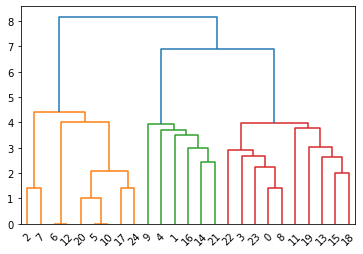

In [11]:
linked = linkage(car_data, 'average', 'euclidean')
dendrogram(linked, orientation='top',\
           distance_sort='descending',\
           show_leaf_counts=True)
plt.show(dendrogram)

In [12]:
cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster1.fit_predict(car_data)

array([1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2,
       1, 1, 0], dtype=int64)

In [13]:
cluster1.labels_

array([1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2,
       1, 1, 0], dtype=int64)

We can see <b>three</b> natural clusters in the bottom part of the dendrogram, labelled as 0, 1 and 2

### Implementing KMeans Algorithm

In [14]:
 from sklearn.cluster import KMeans

In [15]:
clmodel = KMeans(n_clusters=3, random_state=100)
clmodel.fit_transform(car_data)
Labels = clmodel.labels_
print("Centroids of Clusters are :\n", clmodel.cluster_centers_)
print("\n\nLabels are: ", Labels)                                       ### CHARACTERIZATION ###

Centroids of Clusters are :
 [[2.16666667 1.66666667 4.66666667 4.66666667 4.33333333 4.66666667
  4.16666667 1.5        1.33333333 0.         2.16666667 2.
  2.33333333 2.         3.         2.33333333 1.5       ]
 [2.         2.22222222 1.44444444 1.77777778 1.         1.22222222
  1.         4.77777778 4.33333333 0.55555556 2.22222222 2.77777778
  1.88888889 1.33333333 3.22222222 1.22222222 1.44444444]
 [4.4        4.7        2.7        2.1        2.8        2.6
  2.6        1.2        1.4        0.7        1.8        3.4
  2.4        1.3        3.         2.8        1.2       ]]


Labels are:  [2 0 1 2 0 1 1 1 2 0 1 2 1 2 0 2 0 1 2 2 1 0 2 2 1]


In [16]:
Cluster_names1 = ['Conservative', 'Over-spender', 'Average Spender']
Labels = list(map(lambda x: Cluster_names1[x], Labels))

In [17]:
Labels

['Average Spender',
 'Conservative',
 'Over-spender',
 'Average Spender',
 'Conservative',
 'Over-spender',
 'Over-spender',
 'Over-spender',
 'Average Spender',
 'Conservative',
 'Over-spender',
 'Average Spender',
 'Over-spender',
 'Average Spender',
 'Conservative',
 'Average Spender',
 'Conservative',
 'Over-spender',
 'Average Spender',
 'Average Spender',
 'Over-spender',
 'Conservative',
 'Average Spender',
 'Average Spender',
 'Over-spender']

In [18]:
#Creating a dataset of car_data with labels included
new_car_data = pd.concat([car_data, pd.Series(Labels)], axis=1)
new_car_data.columns = list(car_data.columns) + list(['Cluster'])
new_car_data

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Cluster
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,Average Spender
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,Conservative
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,Over-spender
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,Average Spender
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,Conservative
5,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,Over-spender
6,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,Over-spender
7,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,Over-spender
8,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,Average Spender
9,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,Conservative


### Dataset 2 - product_data

In [19]:
product_data = pd.read_excel("C:/Users/HP/Downloads/DM_Ass_Cluster_Assoc/productdata.xls")

In [20]:
product_data

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,1,3,1,0,yes,yes,no,no,no,no,yes,no,no
1,2,6,0,2,no,no,yes,no,yes,no,no,yes,no
2,3,4,1,1,no,no,no,no,no,yes,yes,no,yes
3,4,4,0,2,yes,yes,no,no,no,no,yes,no,no
4,5,3,1,0,yes,yes,no,no,no,no,yes,no,yes
5,6,4,0,2,no,no,no,no,no,yes,yes,no,yes
6,7,8,0,3,no,no,yes,yes,yes,no,no,yes,no
7,8,6,0,1,no,no,yes,no,yes,no,no,yes,no
8,9,7,0,2,no,no,no,yes,yes,no,no,yes,no
9,10,4,2,0,yes,yes,no,no,no,no,yes,no,no


In [21]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resid     40 non-null     int64 
 1   familysz  40 non-null     int64 
 2   chb18     40 non-null     int64 
 3   cha18     40 non-null     int64 
 4   borvita   40 non-null     object
 5   milo      40 non-null     object
 6   zandu     40 non-null     object
 7   dred      40 non-null     object
 8   dblue     40 non-null     object
 9   prtnex    40 non-null     object
 10  holik     40 non-null     object
 11  badya     40 non-null     object
 12  complan   40 non-null     object
dtypes: int64(4), object(9)
memory usage: 4.2+ KB


Removing 'resid' column because it is not useful

In [22]:
product_data.drop(columns=['resid'], inplace=True)
product_data.head()

,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,3,1,0,yes,yes,no,no,no,no,yes,no,no
1,6,0,2,no,no,yes,no,yes,no,no,yes,no
2,4,1,1,no,no,no,no,no,yes,yes,no,yes
3,4,0,2,yes,yes,no,no,no,no,yes,no,no
4,3,1,0,yes,yes,no,no,no,no,yes,no,yes


In [23]:
product_data.shape

(40, 12)

In [24]:
product_data.describe()

,familysz,chb18,cha18
count,40.000000,40.000000,40.000000
mean,4.575000,0.675000,1.150000
std,1.583367,0.729858,1.051251
min,3.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,4.000000,1.000000,1.000000
75%,6.000000,1.000000,2.000000
max,8.000000,2.000000,3.000000


Converting Yes/No data to 1's and 0's

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for col in ['borvita', 'milo', 'zandu', 'dred', 'dblue', 'prtnex', 'holik', 'badya', 'complan']:
    product_data[col] = le.fit_transform(np.asarray(product_data[col]))
    print(le.classes_)

['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [27]:
product_data.head()

,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,3,1,0,1,1,0,0,0,0,1,0,0
1,6,0,2,0,0,1,0,1,0,0,1,0
2,4,1,1,0,0,0,0,0,1,1,0,1
3,4,0,2,1,1,0,0,0,0,1,0,0
4,3,1,0,1,1,0,0,0,0,1,0,1


Let us find the number of <b>Natural Clusters</b> in the data using <b>Heirarchical Clustering</b> Techniques:

### Heirarchical Clustering

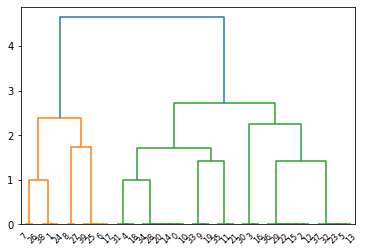

In [28]:
linked = linkage(product_data, 'average', 'euclidean')
dendrogram(linked, orientation='top',\
           distance_sort='descending',\
           show_leaf_counts=True)
plt.show(dendrogram)

In [29]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster2.fit_predict(product_data)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
cluster2.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

We can see <b>two</b> natural clusters in the bottom part of the dendrogram, labelled as 0, 1 and 2

### Implementing KMeans Algorithm

In [31]:
 from sklearn.cluster import KMeans

In [32]:
cl2model = KMeans(n_clusters=2, random_state=100)
cl2model.fit_transform(product_data)
Labels2 = cl2model.labels_
print("Centroids of Clusters are :\n", cl2model.cluster_centers_)
print("\n\nLabels are: ", Labels2)                                       ### CHARACTERIZATION ###

Centroids of Clusters are :
 [[ 3.68965517e+00  9.31034483e-01  7.58620690e-01  6.20689655e-01
   6.20689655e-01  1.11022302e-16  0.00000000e+00 -1.11022302e-16
   4.82758621e-01  1.00000000e+00 -1.11022302e-16  5.86206897e-01]
 [ 6.90909091e+00  1.11022302e-16  2.18181818e+00 -1.11022302e-16
  -1.11022302e-16  8.18181818e-01  5.45454545e-01  1.00000000e+00
  -5.55111512e-17  1.11022302e-16  1.00000000e+00  5.55111512e-17]]


Labels are:  [0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1]


In [33]:
#Creating a dataset of car_data with labels included
new_product_data = pd.concat([product_data, pd.Series(Labels2)], axis=1)
new_product_data.columns = list(product_data.columns) + list(['Cluster'])
new_product_data

,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Cluster
0,3,1,0,1,1,0,0,0,0,1,0,0,0
1,6,0,2,0,0,1,0,1,0,0,1,0,1
2,4,1,1,0,0,0,0,0,1,1,0,1,0
3,4,0,2,1,1,0,0,0,0,1,0,0,0
4,3,1,0,1,1,0,0,0,0,1,0,1,0
5,4,0,2,0,0,0,0,0,1,1,0,1,0
6,8,0,3,0,0,1,1,1,0,0,1,0,1
7,6,0,1,0,0,1,0,1,0,0,1,0,1
8,7,0,2,0,0,0,1,1,0,0,1,0,1
9,4,2,0,1,1,0,0,0,0,1,0,0,0


## II. Market Basket Analysis

Installing mlxtend:

In [34]:
# conda install mlxtend --channel conda-forge

In [35]:
## Importing necessary classes from mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


### Dataset 1

Loading data1

In [36]:
data1 = pd.read_excel("C:/Users/HP/Downloads/DM_Ass_Cluster_Assoc/Data for arules 1.xls")

In [37]:
data1.head()

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,1,3,1,0,yes,yes,no,no,no,no,yes,no,no
1,2,6,0,2,no,no,yes,no,yes,no,no,yes,no
2,3,4,1,1,no,no,no,no,no,yes,yes,no,yes
3,4,4,0,2,yes,yes,no,no,no,no,yes,no,no
4,5,3,1,0,yes,yes,no,no,no,no,yes,no,yes


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resid     40 non-null     int64 
 1   familysz  40 non-null     int64 
 2   chb18     40 non-null     int64 
 3   cha18     40 non-null     int64 
 4   borvita   40 non-null     object
 5   milo      40 non-null     object
 6   zandu     40 non-null     object
 7   dred      40 non-null     object
 8   dblue     40 non-null     object
 9   prtnex    40 non-null     object
 10  holik     40 non-null     object
 11  badya     40 non-null     object
 12  complan   40 non-null     object
dtypes: int64(4), object(9)
memory usage: 4.2+ KB


<b>Converting data into transaction format so that we can pass it to Apriori Algorithm: </b>

For this dataset, we simply need to remove the first 4 columns and convert the values in remaining columns to boolean

In [39]:
data1.drop(columns=['resid', 'familysz', 'chb18', 'cha18'], inplace=True)

In [40]:
data1 = data1.applymap(lambda x: True if x == 'yes' else False)

In [41]:
data1.head()

,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,True,True,False,False,False,False,True,False,False
1,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,True,True,False,True
3,True,True,False,False,False,False,True,False,False
4,True,True,False,False,False,False,True,False,True


Now the data is in the form of transaction table

In [42]:
data1.shape

(40, 9)

Next, we will find the <b>frequent itemsets</b> in the data with specified support count using apriori algorithm

In [43]:
## Note that I have set min_support as 0.175 in order to get Top 20 itemsets

frequent_itemsets1 = apriori(data1, min_support=0.175, use_colnames=True)

In [44]:
frequent_itemsets1

,support,itemsets
0,0.450,(borvita)
1,0.450,(milo)
2,0.225,(zandu)
3,0.275,(dblue)
4,0.350,(prtnex)
5,0.725,(holik)
6,0.275,(badya)
7,0.425,(complan)
8,0.450,"(milo, borvita)"
9,0.450,"(holik, borvita)"


In [45]:
## Finding length of each itemset

frequent_itemsets1["itemsets_length"] = frequent_itemsets1["itemsets"].apply(lambda x: len(x))

In [46]:
frequent_itemsets1

,support,itemsets,itemsets_length
0,0.450,(borvita),1
1,0.450,(milo),1
2,0.225,(zandu),1
3,0.275,(dblue),1
4,0.350,(prtnex),1
5,0.725,(holik),1
6,0.275,(badya),1
7,0.425,(complan),1
8,0.450,"(milo, borvita)",2
9,0.450,"(holik, borvita)",2


In [47]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=1)

In [48]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milo),(borvita),0.450,0.450,0.450,1.0,2.222222,0.247500,inf
1,(borvita),(milo),0.450,0.450,0.450,1.0,2.222222,0.247500,inf
2,(borvita),(holik),0.450,0.725,0.450,1.0,1.379310,0.123750,inf
3,(milo),(holik),0.450,0.725,0.450,1.0,1.379310,0.123750,inf
4,(zandu),(dblue),0.225,0.275,0.225,1.0,3.636364,0.163125,inf
5,(zandu),(badya),0.225,0.275,0.225,1.0,3.636364,0.163125,inf
6,(badya),(dblue),0.275,0.275,0.275,1.0,3.636364,0.199375,inf
7,(dblue),(badya),0.275,0.275,0.275,1.0,3.636364,0.199375,inf
8,(prtnex),(holik),0.350,0.725,0.350,1.0,1.379310,0.096250,inf
9,(prtnex),(complan),0.350,0.425,0.350,1.0,2.352941,0.201250,inf


In [49]:
rules1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(milo),(borvita),0.450,1.0,2.222222
1,(borvita),(milo),0.450,1.0,2.222222
2,(borvita),(holik),0.450,1.0,1.379310
3,(milo),(holik),0.450,1.0,1.379310
4,(zandu),(dblue),0.225,1.0,3.636364
5,(zandu),(badya),0.225,1.0,3.636364
6,(badya),(dblue),0.275,1.0,3.636364
7,(dblue),(badya),0.275,1.0,3.636364
8,(prtnex),(holik),0.350,1.0,1.379310
9,(prtnex),(complan),0.350,1.0,2.352941


#### Finally we print the extracted 22 Rules:

In [50]:
for i in range(22):
    print("Rule ", i+1, " : ", rules1.iloc[i]['antecedents'], "==>", rules1.iloc[i]['consequents'], "; support = ", rules1.iloc[i]['support'], "confidence", rules1.iloc[i]['confidence'],"\n\n")

Rule  1  :  frozenset({'milo'}) ==> frozenset({'borvita'}) ; support =  0.45 confidence 1.0 


Rule  2  :  frozenset({'borvita'}) ==> frozenset({'milo'}) ; support =  0.45 confidence 1.0 


Rule  3  :  frozenset({'borvita'}) ==> frozenset({'holik'}) ; support =  0.45 confidence 1.0 


Rule  4  :  frozenset({'milo'}) ==> frozenset({'holik'}) ; support =  0.45 confidence 1.0 


Rule  5  :  frozenset({'zandu'}) ==> frozenset({'dblue'}) ; support =  0.225 confidence 1.0 


Rule  6  :  frozenset({'zandu'}) ==> frozenset({'badya'}) ; support =  0.225 confidence 1.0 


Rule  7  :  frozenset({'badya'}) ==> frozenset({'dblue'}) ; support =  0.275 confidence 1.0 


Rule  8  :  frozenset({'dblue'}) ==> frozenset({'badya'}) ; support =  0.275 confidence 1.0 


Rule  9  :  frozenset({'prtnex'}) ==> frozenset({'holik'}) ; support =  0.35 confidence 1.0 


Rule  10  :  frozenset({'prtnex'}) ==> frozenset({'complan'}) ; support =  0.35 confidence 1.0 


Rule  11  :  frozenset({'complan'}) ==> frozense

Explanations:
* According to <b>Rule 12</b>, in 45% of the total transactions the customers buy 'milo' and 'borvita' together. And when they do so, they tend to also buy 'holik' with confidence of 1.0 (which means that every time a customer buys milo and borvita, he ALWAYS buys holik)


* According to <b>Rule 16</b>, in 45% of the total transactions the customers buy 'borvita'. And when they do so, they tend to also buy 'milo' and 'holik' with confidence of 1.0 (which means that every time a customer buys borvita, he ALWAYS buys milo AND holik)

### Dataset 2

Loading data2

In [51]:
data2 = pd.read_csv("C:/Users/HP/Downloads/DM_Ass_Cluster_Assoc/Data for arules 2.csv")

In [52]:
data2.head()

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6486475,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,6504964,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,6529569,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,6549521,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data2.shape

(50, 54)

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Row Labels                  50 non-null     int64  
 1   Almonds                     7 non-null      float64
 2   Poha                        2 non-null      float64
 3   Banana                      36 non-null     float64
 4   Beans                       24 non-null     float64
 5   Besan                       2 non-null      float64
 6   Boiled Rice                 20 non-null     float64
 7   Bread                       7 non-null      float64
 8   Brinjals                    2 non-null      float64
 9   Buns & Pavs                 1 non-null      float64
 10  Cakes                       6 non-null      float64
 11  Cashews                     10 non-null     float64
 12  Chips                       2 non-null      float64
 13  Cookies                     2 non-nul

In [55]:
data2[data2.isnull().any(axis=1)].shape  ## All rows have atleast 1 missing value

(50, 54)

<b>Converting data into transaction format so that we can pass it to Apriori Algorithm: </b>

For this dataset, we need to remove the first column and also convert the 'NaN' values to 0

In [56]:
data2.drop(columns=['Row Labels'], inplace=True)

In [57]:
## Imputing the missing values with '0'
for col in data2.columns:
    data2[col].fillna(0)

In [58]:
## Converting to boolean
data2 = data2.applymap(lambda x: True if x == 1 else False)

In [59]:
data2.head()

,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,False,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Now the data is in the form of transaction table

In [60]:
data2.shape

(50, 53)

Next, we will find the <b>frequent itemsets</b> in the data with specified support count using apriori algorithm

In [61]:
## Note that I have set min_support as 0.2

frequent_itemsets2 = apriori(data2, min_support=0.2, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.72,(Banana)
1,0.48,(Beans)
2,0.40,(Boiled Rice)
3,0.20,(Cashews)
4,0.20,(Eggs)
...,...,...
154,0.20,"(Root Vegetables, Other Vegetables, Other Dals..."
155,0.20,"(Root Vegetables, Sugar, Other Dals, Banana)"
156,0.20,"(Urad Dal, Sugar, Other Dals, Banana)"
157,0.20,"(Snacky Nuts, Sugar Cubes, Root Vegetables, Ba..."


In [62]:
## Finding length of each itemset

frequent_itemsets2["itemsets_length"] = frequent_itemsets2["itemsets"].apply(lambda x: len(x))

In [63]:
frequent_itemsets2

,support,itemsets,itemsets_length
0,0.72,(Banana),1
1,0.48,(Beans),1
2,0.40,(Boiled Rice),1
3,0.20,(Cashews),1
4,0.20,(Eggs),1
...,...,...,...
154,0.20,"(Root Vegetables, Other Vegetables, Other Dals...",4
155,0.20,"(Root Vegetables, Sugar, Other Dals, Banana)",4
156,0.20,"(Urad Dal, Sugar, Other Dals, Banana)",4
157,0.20,"(Snacky Nuts, Sugar Cubes, Root Vegetables, Ba...",4


In [64]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=1)

In [65]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Root Vegetables, Boiled Rice)",(Banana),0.22,0.72,0.22,1.0,1.388889,0.0616,inf
1,"(Snacky Nuts, Boiled Rice)",(Banana),0.22,0.72,0.22,1.0,1.388889,0.0616,inf
2,"(Namkeen, Root Vegetables)",(Banana),0.22,0.72,0.22,1.0,1.388889,0.0616,inf
3,"(Snacky Nuts, Sugar Cubes)",(Banana),0.24,0.72,0.24,1.0,1.388889,0.0672,inf
4,"(Urad Dal, Banana)",(Sugar),0.24,0.50,0.24,1.0,2.000000,0.1200,inf
5,"(Beans, Urad Dal)",(Sugar),0.26,0.50,0.26,1.0,2.000000,0.1300,inf
6,"(Urad Dal, Other Vegetables)",(Sugar),0.22,0.50,0.22,1.0,2.000000,0.1100,inf
7,"(Root Vegetables, Urad Dal)",(Sugar),0.20,0.50,0.20,1.0,2.000000,0.1000,inf
8,"(Snacky Nuts, Urad Dal)",(Sugar),0.20,0.50,0.20,1.0,2.000000,0.1000,inf
9,"(Urad Dal, Sugar Cubes)",(Sugar),0.20,0.50,0.20,1.0,2.000000,0.1000,inf


In [66]:
rules2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,"(Root Vegetables, Boiled Rice)",(Banana),0.22,1.0,1.388889
1,"(Snacky Nuts, Boiled Rice)",(Banana),0.22,1.0,1.388889
2,"(Namkeen, Root Vegetables)",(Banana),0.22,1.0,1.388889
3,"(Snacky Nuts, Sugar Cubes)",(Banana),0.24,1.0,1.388889
4,"(Urad Dal, Banana)",(Sugar),0.24,1.0,2.000000
5,"(Beans, Urad Dal)",(Sugar),0.26,1.0,2.000000
6,"(Urad Dal, Other Vegetables)",(Sugar),0.22,1.0,2.000000
7,"(Root Vegetables, Urad Dal)",(Sugar),0.20,1.0,2.000000
8,"(Snacky Nuts, Urad Dal)",(Sugar),0.20,1.0,2.000000
9,"(Urad Dal, Sugar Cubes)",(Sugar),0.20,1.0,2.000000


#### Finally we print the extracted 13 Rules:

In [67]:
for i in range(13):
    print("Rule ", i+1, " : ", rules2.iloc[i]['antecedents'], "==>", rules2.iloc[i]['consequents'], ";   support = ", rules2.iloc[i]['support'], "confidence", rules2.iloc[i]['confidence'],"\n\n")

Rule  1  :  frozenset({'Root Vegetables', 'Boiled Rice'}) ==> frozenset({'Banana'}) ;   support =  0.22 confidence 1.0 


Rule  2  :  frozenset({'Snacky Nuts', 'Boiled Rice'}) ==> frozenset({'Banana'}) ;   support =  0.22 confidence 1.0 


Rule  3  :  frozenset({'Namkeen', 'Root Vegetables'}) ==> frozenset({'Banana'}) ;   support =  0.22 confidence 1.0 


Rule  4  :  frozenset({'Snacky Nuts', 'Sugar Cubes'}) ==> frozenset({'Banana'}) ;   support =  0.24 confidence 1.0 


Rule  5  :  frozenset({'Urad Dal', 'Banana'}) ==> frozenset({'Sugar'}) ;   support =  0.24 confidence 1.0 


Rule  6  :  frozenset({'Beans', 'Urad Dal'}) ==> frozenset({'Sugar'}) ;   support =  0.26 confidence 1.0 


Rule  7  :  frozenset({'Urad Dal', 'Other Vegetables'}) ==> frozenset({'Sugar'}) ;   support =  0.22 confidence 1.0 


Rule  8  :  frozenset({'Root Vegetables', 'Urad Dal'}) ==> frozenset({'Sugar'}) ;   support =  0.2 confidence 1.0 


Rule  9  :  frozenset({'Snacky Nuts', 'Urad Dal'}) ==> frozenset({'Suga

Explanations:
* According to <b>Rule 4</b>, in 24% of the total transactions the customers buy 'Snacky Nuts' and 'Sugar Cubes' together. And when they do so, they tend to also buy 'Banana' with confidence of 1.0 (which means that every time a customer buys Snacky Nuts and Sugar Cubes, he ALWAYS buys Banana)


* According to <b>Rule 8</b>, in 20% of the total transactions the customers buy 'Root Vegetables' and 'Urad Dal' together. And when they do so, they tend to also buy 'Sugar' with confidence of 1.0 (which means that every time a customer buys Root Veg. and Urad Dal, he ALWAYS buys Sugar)